In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
df_fortune= pd.read_csv('__Fortune 500 Companies_Final_.csv')

In [ ]:
df_fortune.columns

Index(['Name', 'Rank', 'Year', 'Industry', 'Headquarters_state',
       'Glassdoor Review', 'Headquarters_city', 'revenue_mil', 'Category',
       'Year Founded'],
      dtype='object')

In [ ]:
#Printing out the unique company names
unique_names = df_fortune_clean['name'].unique()
df_unique_names = pd.DataFrame({'name': unique_names})
df_unique_names.to_csv('unique_company_names.csv', index=False)

In [ ]:
#Printing out the number of times for Compan
name_counts = df_fortune_clean['name'].value_counts()
df_name_counts = pd.DataFrame({'name': name_counts.index, 'Count': name_counts.values})
df_name_counts.to_csv('company_name_counts.csv', index=False)

In [ ]:
!pip install requests beautifulsoup4
!pip install py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install requests beautifulsoup4
!pip install pyexcel pyexcel-xlsx  # Only if you want to work with Excel files


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.7 MB/s eta 0:00:00


In [ ]:
import csv

# Initialize an empty list to store company names
company_names = []

# Load the CSV file
with open('unique_company_names.csv', mode='r') as file:
    reader = csv.reader(file)

    # Iterate through each row in the CSV
    for row in reader:
        # Assuming company names are in the first column (index 0)
        company_name = row[0]
        company_names.append(company_name)

# Print out the company names to verify
print(company_names)

['name', 'General Motors Corporation', 'Ford Motor Company', 'Exxon Corporation', 'Wal-Mart Stores, Inc.', 'AT&T Corp.', 'International Business Machines Corporation', 'General Electric Company', 'Mobil Corporation', 'Chrysler Corporation', 'Philip Morris Companies', 'Prudential Insurance Company of America', 'State Farm Group', 'E.I. Du Pont de Nemours and Company, Inc.', 'Texaco, Inc.', 'Sears, Roebuck & Company', 'Kmart Corporation', 'The Procter & Gamble Company', 'Chevron Corporation', 'Citicorp', 'Hewlett-Packard Company', 'PepsiCo, Inc.', 'Metropolitan Life Insurance Co.', 'Amoco Corporation', 'Motorola, Inc.', 'American International Group,Inc.', 'ConAgra, Inc.', 'The Kroger Company', 'Dayton Hudson Corporation', 'Lockheed Martin Corporation', 'United Technologies Corporation', 'The Allstate Corporation', 'Federal National Mortgage Association', 'Merrill Lynch & Company, Inc.', 'J.C. Penney Company, Inc.', 'United Parcel Service of America, Inc.', 'The Dow Chemical Company', 'B

In [ ]:
#Scrapping for Company Year
import requests
from bs4 import BeautifulSoup
import csv
import re

def get_founding_year(company_name):
    """Fetches the founding year of a company from Wikipedia."""
    try:
        url = f"https://en.wikipedia.org/wiki/{company_name.replace(' ', '_')}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        infobox = soup.find('table', {'class': 'infobox'})
        if infobox:
            rows = infobox.find_all('tr')
            for row in rows:
                if 'Founded' in row.text:
                    founding_date = row.find('td').text.strip()
                    year_match = re.search(r'\b\d{4}\b', founding_date)
                    if year_match:
                        return year_match.group(0)
        return "Year not found"
    except Exception as e:
        return f"Error: {str(e)}"

def read_company_names(filename):
    """Reads all company names from a CSV file."""
    with open(filename, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header if there's one
        company_names = [row[0] for row in reader]
    return company_names

def write_results(filename, results):
    """Writes the results to a CSV file."""
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Company", "Founding Year"])
        writer.writerows(results)

def main():
    # Read all company names from the input CSV file
    company_names = read_company_names('unique_company_names.csv')

    # Get founding years for each company
    results = []
    for company in company_names:
        founding_year = get_founding_year(company)
        results.append([company, founding_year])
        print(f"{company}: {founding_year}")

    # Save results to the output CSV file
    write_results('founding_years.csv', results)

if __name__ == "__main__":
    main()



FileNotFoundError: [Errno 2] No such file or directory: 'unique_company_names.csv'

In [ ]:
#Used to Retrieve Founding years of the company

import requests
from bs4 import BeautifulSoup
import csv
import re

def get_founding_year(company_name):
    """Fetches the founding year of a company from Wikipedia."""
    try:
        url = f"https://www.google.com/search?q={company_name.replace(' ', '+')}+founding+year"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        infobox = soup.find('table', {'class': 'infobox'})
        if infobox:
            rows = infobox.find_all('tr')
            for row in rows:
                if 'Founded' in row.text:
                    founding_date = row.find('td').text.strip()
                    year_match = re.search(r'\b\d{4}\b', founding_date)
                    if year_match:
                        return year_match.group(0)
        return "Year not found"
    except Exception as e:
        return f"Error: {str(e)}"

def read_company_names(filename):
    """Reads all company names from a CSV file."""
    with open(filename, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header if there's one
        company_names = [row[0] for row in reader]
    return company_names

def write_results(filename, results):
    """Writes the results to a CSV file."""
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Company", "Founding Year"])
        writer.writerows(results)

def main():
    # Read all company names from the input CSV file
    company_names = read_company_names('founding_number_1.csv')

    # Get founding years for each company
    results = []
    for company in company_names:
        founding_year = get_founding_year(company)
        results.append([company, founding_year])
        print(f"{company}: {founding_year}")

    # Save results to the output CSV file
    write_results('founding_years.csv', results)

if __name__ == "__main__":
    main()

CHS Electronics, Inc.: Year not found
CInergy Corp.: Year not found
Universal Forest Products,Inc.: Year not found
Premcor: Year not found
ProSource: Year not found
Giant Food Inc.: Year not found
SLM Holding Corp: Year not found
Mapco Inc.: Year not found
American Family Mutual Insurance Company: Year not found
AirTouch Communications, Inc.: Year not found
Borden, Inc. and Affiliates: Year not found
Rykoff-Sexton, Inc.: Year not found
The BFGoodrich Company: Year not found
Richfood Holdings: Year not found
TruServ Corporation: Year not found
Corporate Express, Inc.: Year not found
GenAmerica Corporation: Year not found
HEALTHSOUTH Corporation: Year not found
IMC Global, Inc.: Year not found
Airborne Freight Corporation: Year not found
Leggett & Platt, Inc.: Year not found
U.S. Office Products Company: Year not found
Comdisco, Inc.: Year not found
Chase Manhattan Corp: Year not found
McKesson HBOC Inc.: Year not found
MCI WorldCom, Inc.: Year not found
United Health Care Corporation: 

KeyboardInterrupt: 

In [ ]:
#Graphing

# Check for typos and correct the column name if necessary
yearly_total_revenue = df_fortune.groupby('Year')['revenue_mil'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_total_revenue.index, y=yearly_total_revenue.values, color='b')
plt.title('Trend of Total Revenue of Fortune 500 Companies Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Revenue (in millions)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'total_revenue_trend.png'), dpi=300)

# If the column is missing, you may need to add it to the DataFrame or reload the data.

TypeError: 'module' object is not callable

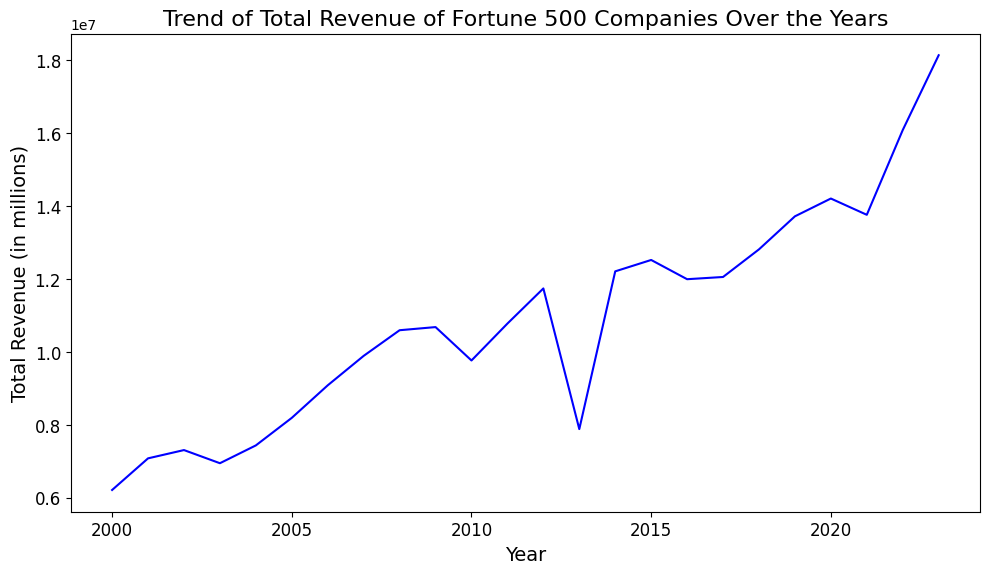

In [ ]:
import matplotlib.pyplot as plt # Ensure matplotlib.pyplot is imported correctly
import seaborn as sns
import os

# Check for typos and correct the column name if necessary
yearly_total_revenue = df_fortune.groupby('Year')['revenue_mil'].sum()
plt.figure(figsize=(10, 6)) # Now plt refers to the correct module
sns.lineplot(x=yearly_total_revenue.index, y=yearly_total_revenue.values, color='b')
plt.title('Trend of Total Revenue of Fortune 500 Companies Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Revenue (in millions)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# If the column is missing, you may need to add it to the DataFrame or reload the data.

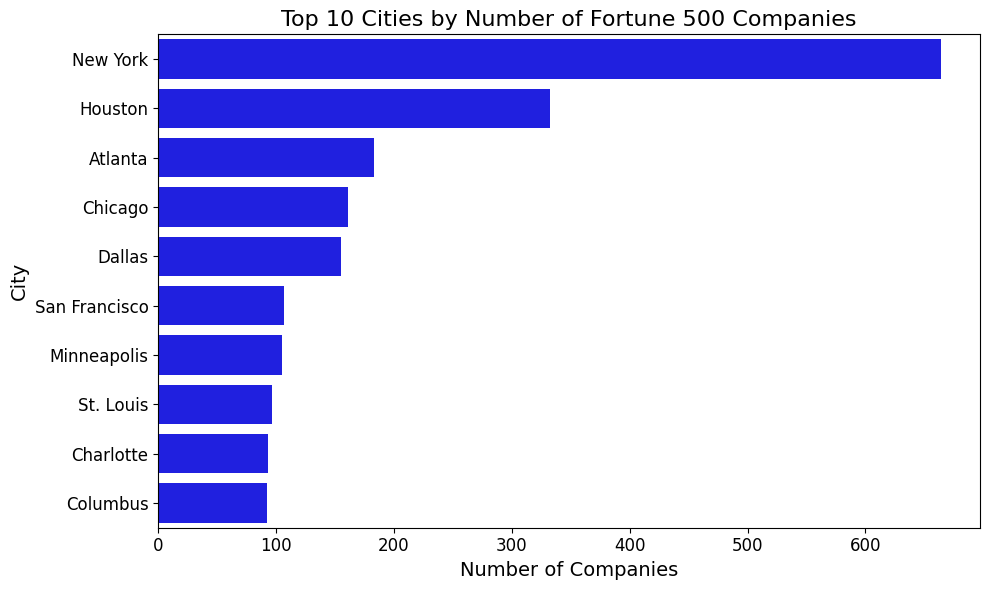

In [ ]:
city_counts = df_fortune['Headquarters_city'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=city_counts.index, x=city_counts.values, color='b')
plt.title('Top 10 Cities by Number of Fortune 500 Companies', fontsize=16)
plt.xlabel('Number of Companies', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
